# Facebook Ads Optimisation

## Problem Statement:

* Predict the Advertisements that have been visited by most of Facebook's Users

### Some of the attributes of the dataset:
1. Advertisement 1

2. Advertisement 2

3. Advertisement 3
        .
        .
        .
10. Advertisement 10


## Solution:

* As the data is a collection of Rewards (1) and Penalities (0), Reinforcement Learning can be used.

* Where agent interacts with the enviroment and learns the best action to take.

* Some of the Reinforcement Learning algorithms are: 

    1. Upper Confidence Bound

    2. Thompsons Sampling


## Importing libraries

In [204]:
#data handling libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

## Importing dataset

In [205]:
dataset = pd.read_csv('Facebook Ads Optimisation.csv')

In [206]:
dataset

,Advertisement 1,Advertisement 2,Advertisement 3,Advertisement 4,Advertisement 5,Advertisement 6,Advertisement 7,Advertisement 8,Advertisement 9,Advertisement 10
0,0,0,0,1,0,1,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14995,1,1,0,0,0,0,0,0,0,0
14996,0,1,0,1,0,0,0,0,0,0
14997,0,0,0,0,0,0,0,0,0,0
14998,0,0,0,0,0,0,0,0,1,0


## Implementing Thompson's Sampling Algorithm 

In [207]:
from random import betavariate

#### Thompson's Sampling

In [208]:
N = 15000
num_ads = 10
ads_selected = []
number_of_rewards = [0]*num_ads
number_of_penalities = [0]*num_ads
beta_ditsributions = [[] for _ in range(num_ads)]
total_reward = 0

for n in range(N):
    ad = 0
    beta_max = 0
    # iterating to find ad with highest random beta distribution
    for i in range(num_ads):
        beta_d = betavariate(number_of_rewards[i]+1, number_of_penalities[i]+1)
        beta_ditsributions[i].append(beta_d)
        if beta_d > beta_max:
            beta_max = beta_d
            ad = i
    #add the ad selected into selected ads
    ads_selected.append(ad)
    # obtaining actual value for the ad from dataset
    reward = dataset.values[n, ad]
    if reward == 1:
        number_of_rewards[ad] += 1
    else:
        number_of_penalities[ad] += 1
    total_reward += reward


In [209]:
number_of_rewards

[2, 35, 8, 3739, 7, 0, 0, 2, 44, 4]

In [210]:
number_of_penalities

[39, 160, 71, 10486, 64, 28, 27, 37, 202, 45]

In [211]:
total_reward

3841

#### Rewards by each Ad

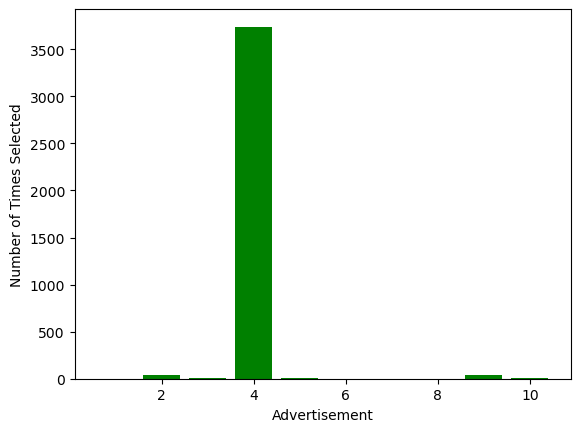

In [212]:
plt.bar(range(1,11),number_of_rewards,color='green')
plt.xlabel('Advertisement')
plt.ylabel('Number of Times Selected')
plt.show()

#### Penalities by each Ad

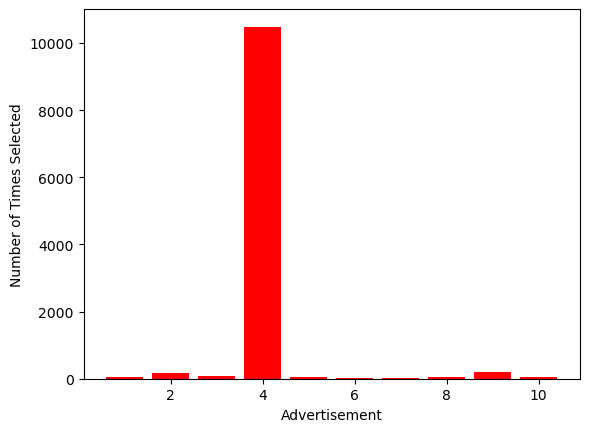

In [213]:
plt.bar(range(1, 11), number_of_penalities,color='red')
plt.xlabel('Advertisement')
plt.ylabel('Number of Times Selected')
plt.show()


## Histogram Visualization

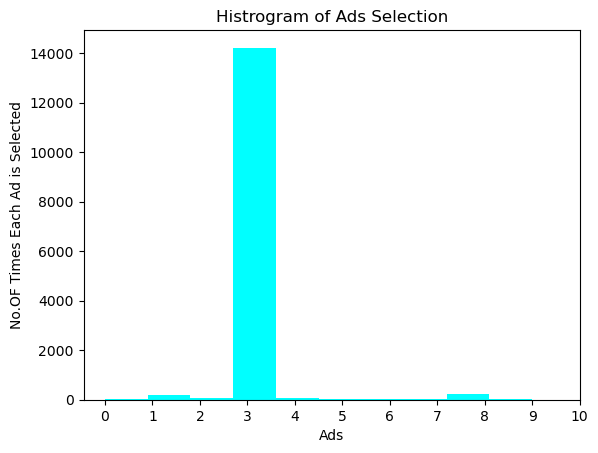

In [214]:
plt.hist(ads_selected,color='cyan')
plt.title('Histrogram of Ads Selection')
plt.xlabel('Ads')
plt.xticks(range(0,11))
plt.ylabel('No.Of Times Each Ad is Selected')
plt.show()

In [215]:
from collections import Counter
print(Counter(ads_selected))

Counter({3: 14225, 8: 246, 1: 195, 2: 79, 4: 71, 9: 49, 0: 41, 7: 39, 5: 28, 6: 27})


##### Advertisement 4 is selected most of the times, So it's better to display this ad most of the times for capturing the customer base.

In [216]:
len(beta_ditsributions[1])

15000

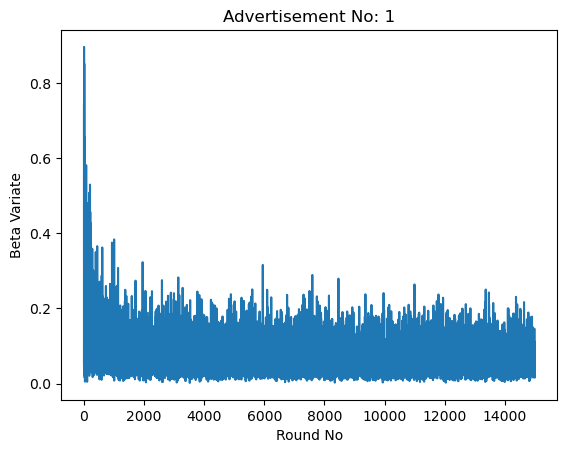

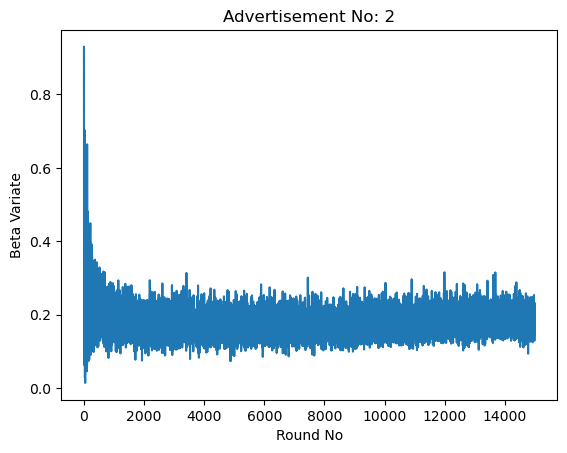

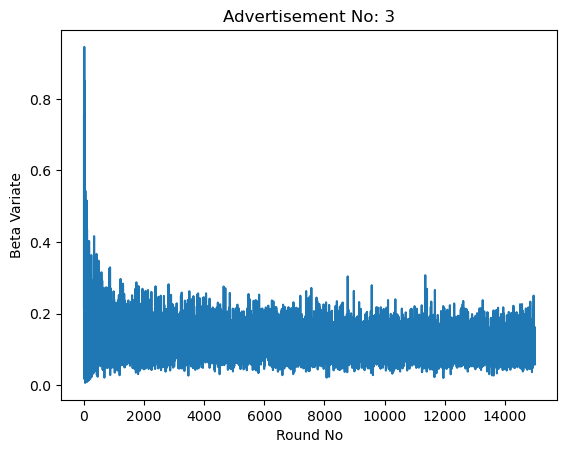

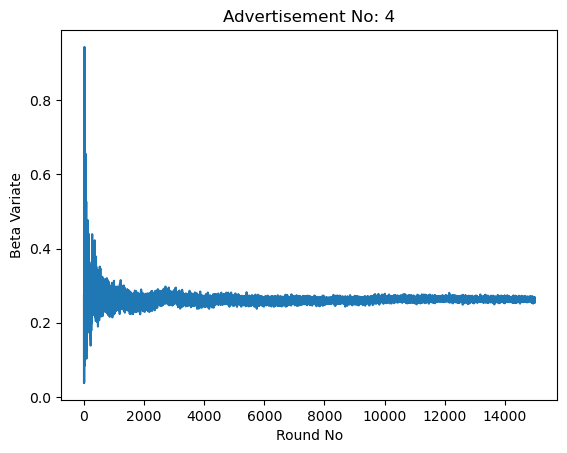

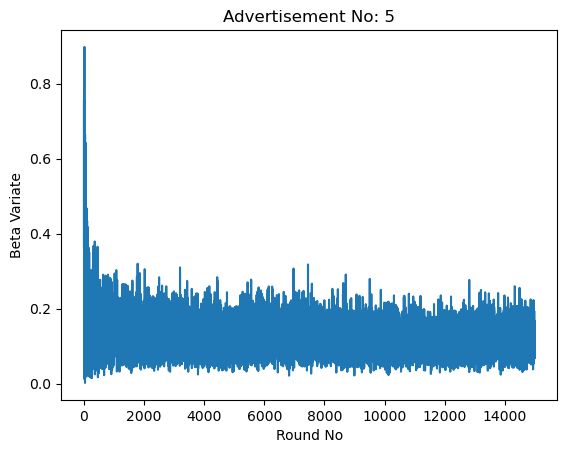

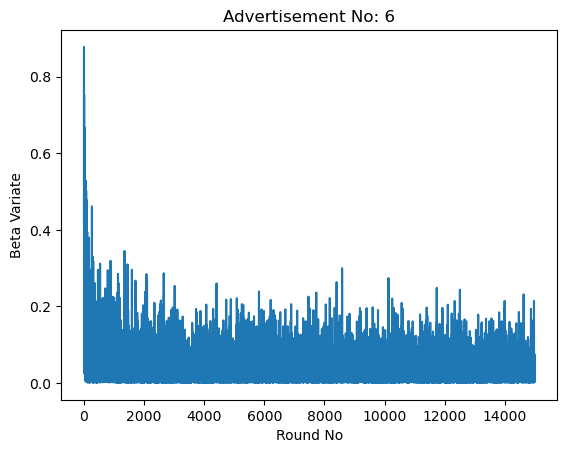

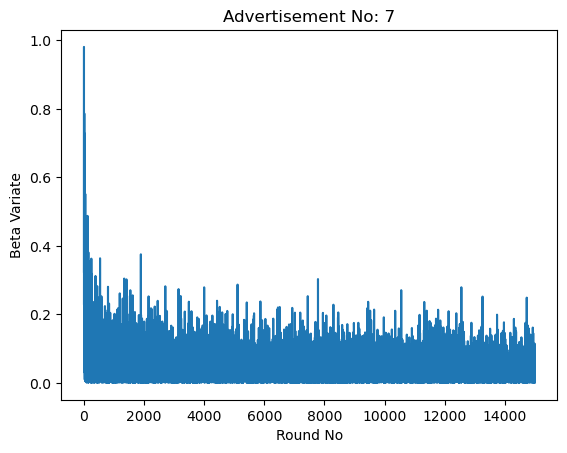

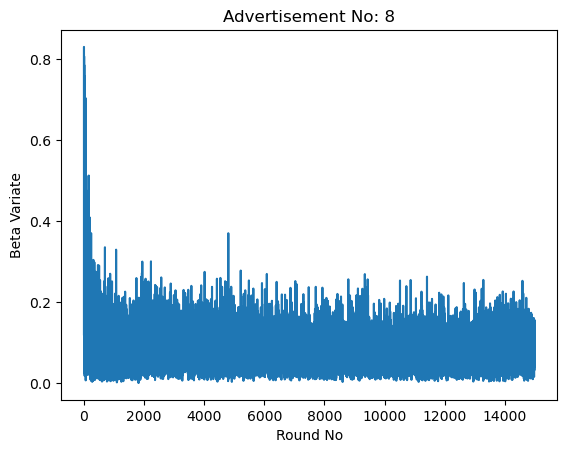

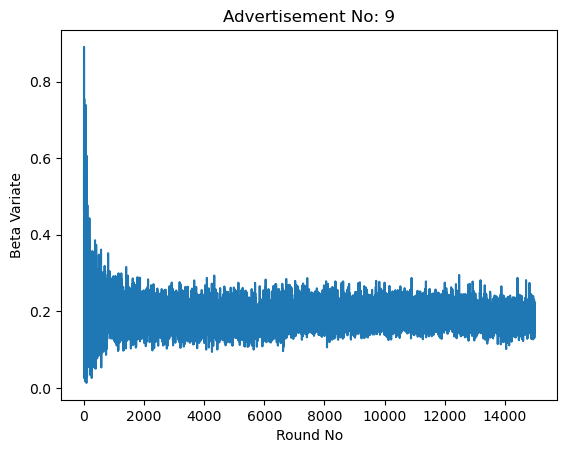

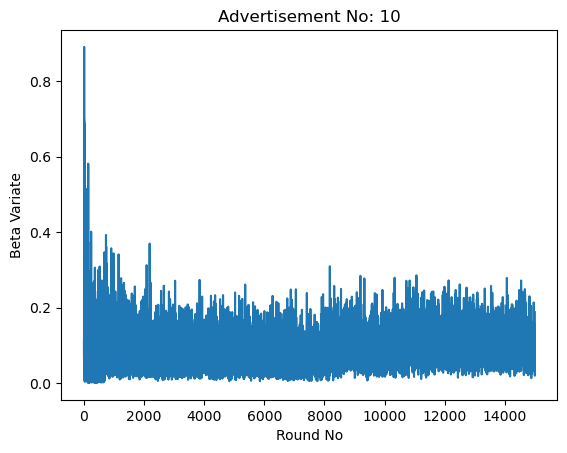

In [223]:
for distribution in beta_ditsributions:
    plt.plot(range(N),distribution)
    plt.title('Advertisement No: '+str(beta_ditsributions.index(distribution)+1))
    plt.xlabel('Round No')
    plt.ylabel('Beta Variate')
    plt.show()

### From the Beta Distribution, Advertisement 4 has Outperformed Rest of the Ads Consistently.